In [2]:
from nbindex import floating
floating.tableofcontent()

In [3]:
%pylab inline
from ipywidgets.widgets import HTML
import os 
basedir="/v/courses/dataexpviz.public/Datasets/D-Shapes-Maps-Coordinates/"

2022-02-27 22:55:33,463 [116] WARNING  py.warnings:109: [JupyterRequire] /opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['floating']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +



Populating the interactive namespace from numpy and matplotlib


# Maps, shapes, coordinates

## Examples for 2D and 3D maps

* With folium 

<img src="https://miro.medium.com/max/1400/1*_mwJWphhLKix_Yh-SySboQ.png" width=65% />

* And with kepler.gl

<img src="https://d1a3f4spazzrp4.cloudfront.net/kepler.gl/website/hero/kepler.gl-contours.png" width=65% />

## Used packages, module, formats

* shapely
* folium
* geopandas
* json, geojson


In many scenarios, either in simulations or when working with real-world data, it may be necessary to use concepts from geometry when programming. In the following, we are going to have a look at some possible scenarios, and in the second part of the notebook, we are going to add geometries to maps created from several input formats.

# Shapely
## Points, polygons and lines

Perhaps the most common Python library for dealing with shapes is called [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html)

## Spatial Data Model

The fundamental types of geometric objects implemented by Shapely are *points*, *curves*, and *surfaces*. Each is associated with three sets of points in the plane. The *interior*, *boundary*, and *exterior* sets of a feature are mutually exclusive.

* A *Point* has an *interior* set of exactly one point, a *boundary* set of exactly no points, and an *exterior* set of all other points. A Point has a topological dimension of 0.
* A *Curve* has an *interior* set consisting of the infinitely many points along its length (imagine a *Point* dragged in space), a *boundary* set consisting of its two end points, and an *exterior* set of all other points. A *Curve* has a topological dimension of 1.
* A *Surface* has an *interior* set consisting of the infinitely many points within (imagine a *Curve* dragged in space to  over an area), a *boundary* set consisting of one or more *Curves*, and an *exterior* set of all other points including those within holes that might exist in the surface. A *Surface* has a topological dimension of 2.

Let's import them!

In [4]:
from shapely.geometry import Point,Polygon,LineString

Let us define a point! We create an object of the `Point()` class, that can be in 2 or 3 dimensions.

In [5]:
p = Point([0,0])

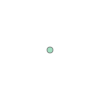

In [6]:
p

or a line

In [7]:
l = LineString([[-2,1],[3,5]])

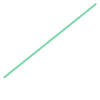

In [8]:
l

We can create polygons by giving a list of coordinates to the constructor of the `Polygon()` class. We don't have to duplicate the first coordinate in the last element, but then our polygon won't be closed.

In [9]:
square = Polygon([[-1,-1],[-1,1],[1,1],[1,-1]])

In a Jupyter notebook, we can easily display our shapes.

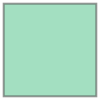

In [10]:
square

Let's write a function that creates regular polygons!

In [11]:
import numpy as np

In [12]:
def regular(n,R=1.5):
    t = np.linspace(0,2*np.pi,n+1)
    return Polygon([[R*np.cos(elem),R*np.sin(elem)] for elem in t])

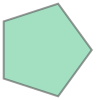

In [13]:
fivefold = regular(5)
fivefold

Let's make some simple operations with our polygons:

In [14]:
fivefold.area

5.349692904160239

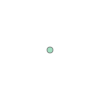

In [15]:
fivefold.centroid

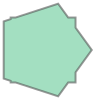

In [16]:
fivefold.union(square)

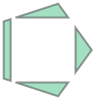

In [17]:
fivefold.difference(square)

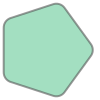

In [18]:
fivefold.buffer(0.4)

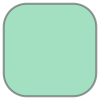

In [19]:
square.buffer(1)

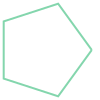

In [20]:
fivefold.boundary

In [21]:
fivefold.boundary.geom_type

'LineString'

# Simple maps
## Folium


If we do the data analysis in Python, then it would be convenient to put our data on a map in Python, too. There are some libraries that enable the usage of the powerful and lightweight [Leaflet.js](https://leafletjs.com/) library in Python. In the following cells, we are going to have a look at some basic functionalities of these maps in Folium. You may use another library as you choose.

In [22]:
import folium

Let's display the inner city of Budapest in a Jupyter Notebook!

In [23]:
folium.Map(location=[47.5,19.05],zoom_start=13)

The map used the tiles of the openstreetmap.org freely available database. There are many other options depending on our aims, see https://deparkes.co.uk/2016/06/10/folium-map-tiles/. A rather artistic approach for example is:

In [24]:
folium.Map(location=[47.5,19.05],zoom_start=13,tiles='stamenwatercolor')

Let's stick to a more scientific version, and let's add some useful objects to our map!

In [25]:
mymap = folium.Map(location=[47.5,19.05],zoom_start=13,tiles='cartodbpositron')
marker = folium.Marker(location=[47.4744,19.0615],popup='ELTE')
marker.add_to(mymap)
mymap

In [26]:
mymap = folium.Map(location=[47.5,19.05],zoom_start=13,tiles='cartodbpositron')
marker = folium.Marker(location=[47.4744,19.0615],popup='ELTE')
mymap.add_child(marker)

Which coordinate reference system does our map use? https://epsg.io/3857

In [27]:
mymap.crs

'EPSG3857'

In [28]:
mymap.get_bounds()

[[47.4744, 19.0615], [47.4744, 19.0615]]

In [29]:
mymap.fit_bounds(mymap.get_bounds())
mymap

## Geopandas

The ultimate tool to read almost any kind of geographical data is GeoPandas.

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

In [30]:
import geopandas as gpd

We are going to try out some simple operations on Hungarian county and highway data. You can download the county dataset from here: https://data2.openstreetmap.hu/hatarok/index.php?admin=6. It contains so-called shapefiles that store the geometric information and the metadata as well. The `.shp` file can be opened in geopandas as follows:

In [31]:
megyek = gpd.read_file(os.path.join(basedir, 'shapes/admin6.shp'), encoding = 'utf8')
megyek.head()

NAME ADMIN_LEVE  \
0    Borsod-Abaúj-Zemplén megye          6   
1  Szabolcs-Szatmár-Bereg megye          6   
2                     Vas megye          6   
3                 Baranya megye          6   
4                    Zala megye          6   

                                            geometry  
0  POLYGON ((2232168.060 6134802.910, 2232283.740...  
1  POLYGON ((2346476.670 6107200.500, 2346481.620...  
2  POLYGON ((1793789.660 5920727.330, 1793969.030...  
3  POLYGON ((1962014.010 5778448.350, 1962316.680...  
4  POLYGON ((1821480.850 5906302.740, 1821599.060...

The geometry column contains the already known shapely `Polygon` class objects! Let's check Borsod-Abaúj-Zemplén:

In [32]:
baz = megyek['geometry'][0]

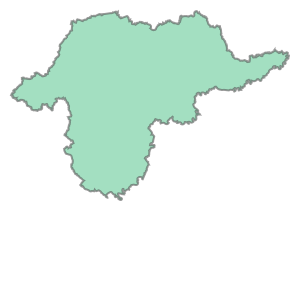

In [33]:
baz

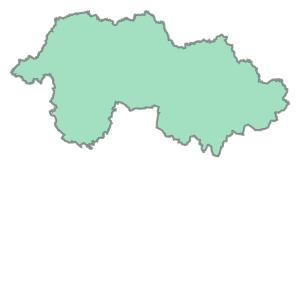

In [34]:
megyek['geometry'][0].union(megyek['geometry'][1])

In [35]:
from shapely.geometry import Point
cp = Point(megyek.centroid.x.mean(),megyek.centroid.y.mean())

In [36]:
from shapely.geometry import MultiPolygon as MP

In [40]:
m2 = megyek.affine_transform([1.2, 0, 0, 0, 1.2, 0])

In [20]:
MP([r for r in megyek['geometry'].apply(lambda x: (x.centroid - cp)*1.2+x)])

TypeError: unsupported operand type(s) for *: 'Point' and 'float'

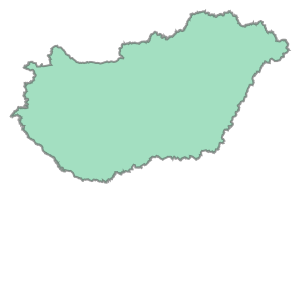

In [41]:
t=megyek['geometry'][0]
for i in range(1,megyek.shape[0]):
    t = t.union(megyek['geometry'][i])
t

In [48]:
type(m2)

geopandas.geoseries.GeoSeries

In [50]:
t=m2[0] #megyek['geometry'][0]
for i in range(1, len(m2)):
    t = t.union(m2[i])
t

2022-02-27 22:59:45,775 [116] ERROR    shapely.geos:252: [JupyterRequire] TopologyException: Input geom 0 is invalid: Self-intersection at or near point 2678602.872 0 at 2678602.872 0


TopologicalError: The operation 'GEOSUnion_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x7f7a66e39fa0>

Which coordinate system did this shapefile use? http://geopandas.org/projections.html

In [118]:
megyek.crs

<Derived Projected CRS: EPSG:3785>
Name: Popular Visualisation CRS / Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Mercator
- method: Mercator (1SP) (Spherical)
Datum: Popular Visualisation Datum
- Ellipsoid: Popular Visualisation Sphere
- Prime Meridian: Greenwich

Which county has the biggest area?

In [119]:
megyek['NAME'][megyek.area.idxmax]

'Bács-Kiskun megye'

Let us create a list of neighboring counties.

First, we 'inflate' our polygons.

In [120]:
from copy import deepcopy

In [121]:
infl_megyek = deepcopy(megyek) # this the method for duplicating a variable without overwriting the original one
infl_megyek['geometry'] = infl_megyek['geometry'].buffer(10)
infl_megyek2 = deepcopy(infl_megyek)

In [122]:
infl_megyek2

NAME ADMIN_LEVE  \
0     Borsod-Abaúj-Zemplén megye          6   
1   Szabolcs-Szatmár-Bereg megye          6   
2                      Vas megye          6   
3                  Baranya megye          6   
4                     Zala megye          6   
5                   Somogy megye          6   
6        Győr-Moson-Sopron megye          6   
7                 Veszprém megye          6   
8                    Tolna megye          6   
9              Bács-Kiskun megye          6   
10                   Fejér megye          6   
11       Komárom-Esztergom megye          6   
12                      Budapest          6   
13                    Pest megye          6   
14                Csongrád megye          6   
15                   Békés megye          6   
16    Jász-Nagykun-Szolnok megye          6   
17                   Heves megye          6   
18             Hajdú-Bihar megye          6   
19                  Nógrád megye          6   

                                             geometry  
0   POLYGON ((2232163.205 6134794.168, 2232162.378...  
1   POLYGON ((2346476.290 6107190.507, 2346475.319...  
2   POLYGON ((1793781.471 5920721.591, 1793780.962...  
3   POLYGON ((1962007.055 5778441.165, 1962006.385...  
4   POLYGON ((1821470.856 5906302.397, 1821470.870...  
5   POLYGON ((1878534.349 5830688.458, 1878534.122...  
6   POLYGON ((1828027.585 6051349.739, 1828027.234...  
7   POLYGON ((1900609.773 5950389.797, 1900609.797...  
8   POLYGON ((2003937.078 5844761.461, 2003936.400...  
9   POLYGON ((2085347.466 5787630.697, 2085347.001...  
10  POLYGON ((2007550.806 5997798.219, 2007550.629...  
11  POLYGON ((1989363.301 6017208.951, 1989363.330...  
12  POLYGON ((2106727.229 6031340.927, 2106726.480...  
13  POLYGON ((2080389.505 6036804.511, 2080389.076...  
14  POLYGON ((2186104.315 5822821.882, 2186103.845...  
15  POLYGON ((2271743.141 5919174.305, 2271742.991...  
16  POLYGON ((2187578.665 6034316.095, 2187577.886...  
17  POLYGON ((2178642.065 6062871.334, 2178641.366...  
18  POLYGON ((2318123.963 6047281.347, 2318123.878...  
19  POLYGON ((2107053.464 6116358.146, 2107053.011...

In [123]:
neighbors = gpd.sjoin(infl_megyek, infl_megyek2, how ='left', op='intersects')[['NAME_left','NAME_right']]

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [124]:
neighbors.head(9)

NAME_left                    NAME_right
0    Borsod-Abaúj-Zemplén megye                  Nógrád megye
0    Borsod-Abaúj-Zemplén megye                   Heves megye
0    Borsod-Abaúj-Zemplén megye    Jász-Nagykun-Szolnok megye
0    Borsod-Abaúj-Zemplén megye    Borsod-Abaúj-Zemplén megye
0    Borsod-Abaúj-Zemplén megye             Hajdú-Bihar megye
0    Borsod-Abaúj-Zemplén megye  Szabolcs-Szatmár-Bereg megye
1  Szabolcs-Szatmár-Bereg megye    Borsod-Abaúj-Zemplén megye
1  Szabolcs-Szatmár-Bereg megye             Hajdú-Bihar megye
1  Szabolcs-Szatmár-Bereg megye  Szabolcs-Szatmár-Bereg megye

## Reprojecting coordinates

Let's plot the hungarian railway network!

<AxesSubplot:>

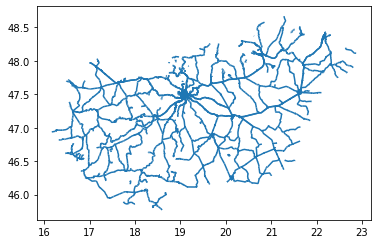

In [160]:
railways = gpd.read_file(os.path.join(basedir + 'shapes/gis.osm_railways_free_1.shp'))
railways.plot()

This looks a bit flattened. Let's check out the coordinate system of this data:

In [126]:
railways.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

So what is **epsg:4326** ? 

We can find more information about coordinate systems used for maps at *https://epsg.io/*

https://epsg.io/4326 tells us, that this is the code for 
```
WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS 
```

We will convert our coordinates to ``` WGS 84 / World Mercator```, which is used by Google Maps as well.


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

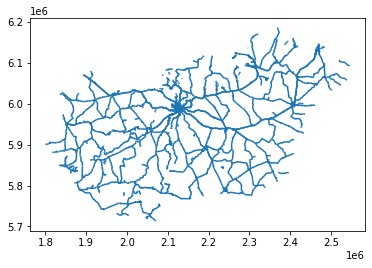

In [127]:
railways.to_crs({'init': 'epsg:3395'}, inplace=True)
railways.plot()

It would be nice to put this network onto a map. This is what we are going to do at the end of the following section.

## Spatial index
How long railway network does each hungarian county have?


We should reproject the county dataset to match the projection of the railway dataset and look for the intersecting set fo points.

In [129]:
megyek.to_crs({'init': 'epsg:3395'}, inplace=True)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [128]:
# That would be the command without an R-Tree search. This takes too long!
# rr = railways.intersects(geometry_BAZ_megye)

Sometimes it is useful to speed up spatial operations using a spatial index. 
https://en.wikipedia.org/wiki/R-tree

Here is a good introduction into R-trees in geopandas: http://geoffboeing.com/2016/10/r-tree-spatial-index-python/
```
An R-tree represents individual objects and their bounding boxes (the “R” is for “Rectangle”) as the lowest level of the spatial index. It then aggregates nearby objects and represents them with their aggregate bounding box in the next higher level of the index
```

Creating an R-tree index in geopandas:

In [130]:
spatial_index = railways.sindex

In [131]:
type(spatial_index)

geopandas.sindex.RTreeIndex

In [132]:
megyek.head()

NAME ADMIN_LEVE  \
0    Borsod-Abaúj-Zemplén megye          6   
1  Szabolcs-Szatmár-Bereg megye          6   
2                     Vas megye          6   
3                 Baranya megye          6   
4                    Zala megye          6   

                                            geometry  
0  POLYGON ((2232168.060 6102949.358, 2232283.740...  
1  POLYGON ((2346476.670 6075429.715, 2346481.620...  
2  POLYGON ((1793789.660 5889529.746, 1793969.030...  
3  POLYGON ((1962014.010 5747704.839, 1962316.680...  
4  POLYGON ((1821480.850 5875150.527, 1821599.060...

In [133]:
railways.head()

osm_id  code fclass  name  \
0  4292868  6101   rail  None   
1  4293011  6101   rail  None   
2  4351791  6101   rail  None   
3  4351792  6101   rail  None   
4  4418653  6101   rail  None   

                                            geometry  
0  LINESTRING (2002714.038 5754888.131, 2002519.3...  
1  LINESTRING (2015416.805 5786359.637, 2015421.0...  
2  LINESTRING (2013463.894 6035312.050, 2013461.1...  
3  LINESTRING (2013395.599 6034466.361, 2013391.2...  
4  LINESTRING (2204378.657 6091841.304, 2204393.4...

In [134]:
#The intersection of the railway system with each of the counties
megyek['possible_matches'] = megyek['geometry'].map(lambda g: list(spatial_index.intersection(g.bounds)))

Trying out the concept.

Take a look at the new column in *megyek*:

In [135]:
megyek.head()

NAME ADMIN_LEVE  \
0    Borsod-Abaúj-Zemplén megye          6   
1  Szabolcs-Szatmár-Bereg megye          6   
2                     Vas megye          6   
3                 Baranya megye          6   
4                    Zala megye          6   

                                            geometry  \
0  POLYGON ((2232168.060 6102949.358, 2232283.740...   
1  POLYGON ((2346476.670 6075429.715, 2346481.620...   
2  POLYGON ((1793789.660 5889529.746, 1793969.030...   
3  POLYGON ((1962014.010 5747704.839, 1962316.680...   
4  POLYGON ((1821480.850 5875150.527, 1821599.060...   

                                    possible_matches  
0  [13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...  
1  [13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...  
2  [7156, 7157, 5069, 7151, 7158, 14302, 6664, 14...  
3  [4079, 4075, 6982, 6984, 6983, 942, 10380, 103...  
4  [13123, 13122, 90, 4698, 13120, 13124, 4700, 1...

In [136]:
railway_Nograd_megye = megyek[megyek.NAME=='Nógrád megye']['possible_matches'] #The intersection of the railway system with the given county

<AxesSubplot:>

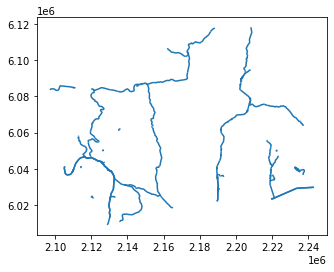

In [137]:
railways.iloc[railway_Nograd_megye.array[0]].plot()

These line extend over the borders of the county, so we need find the intersecting set of the network.

In [138]:
def filter_railways(indices, polygon):
    #Selects points 
    sdf = railways.iloc[indices]
    return list(sdf[sdf.intersects(polygon)].index)

<AxesSubplot:>

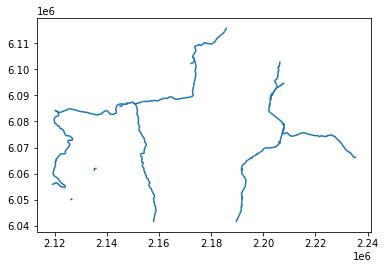

In [139]:
geometry_Nograd_megye = megyek[megyek.NAME=='Nógrád megye']['geometry']   
railways.loc[filter_railways(railway_Nograd_megye.array[0], geometry_Nograd_megye.array[0])].plot()

Creating the intersections, calculating the lengths in km:

In [140]:
megyek['matches'] = megyek.apply(lambda row: filter_railways(row['possible_matches'], row['geometry']),axis=1)
megyek['lengths']= megyek['matches'].map(lambda m: sum(railways.loc[m].length)/1000)

megyek.sort_values(by='lengths',ascending=False)

NAME ADMIN_LEVE  \
12                      Budapest          6   
13                    Pest megye          6   
1   Szabolcs-Szatmár-Bereg megye          6   
0     Borsod-Abaúj-Zemplén megye          6   
18             Hajdú-Bihar megye          6   
9              Bács-Kiskun megye          6   
16    Jász-Nagykun-Szolnok megye          6   
6        Győr-Moson-Sopron megye          6   
10                   Fejér megye          6   
15                   Békés megye          6   
5                   Somogy megye          6   
17                   Heves megye          6   
7                 Veszprém megye          6   
2                      Vas megye          6   
14                Csongrád megye          6   
4                     Zala megye          6   
11       Komárom-Esztergom megye          6   
3                  Baranya megye          6   
8                    Tolna megye          6   
19                  Nógrád megye          6   

                                             geometry  \
12  POLYGON ((2106733.130 5999808.409, 2107187.900...   
13  POLYGON ((2080398.300 6005251.973, 2081054.670...   
1   POLYGON ((2346476.670 6075429.715, 2346481.620...   
0   POLYGON ((2232168.060 6102949.358, 2232283.740...   
18  POLYGON ((2318133.870 6015693.428, 2318275.220...   
9   POLYGON ((2085356.030 5756862.585, 2085962.160...   
16  POLYGON ((2187584.190 6002774.733, 2188030.250...   
6   POLYGON ((1828036.710 6019752.136, 1828066.720...   
10  POLYGON ((2007560.540 5966363.025, 2007993.660...   
15  POLYGON ((2271752.940 5887983.588, 2272129.460...   
5   POLYGON ((1878544.010 5799779.100, 1878570.100...   
17  POLYGON ((2178648.510 6031242.211, 2179349.370...   
7   POLYGON ((1900619.770 5919099.636, 1900674.480...   
2   POLYGON ((1793789.660 5889529.746, 1793969.030...   
14  POLYGON ((2186112.740 5791940.556, 2186915.440...   
4   POLYGON ((1821480.850 5875150.527, 1821599.060...   
11  POLYGON ((1989373.300 5985711.869, 1989433.450...   
3   POLYGON ((1962014.010 5747704.839, 1962316.680...   
8   POLYGON ((2003944.080 5813811.612, 2004189.200...   
19  POLYGON ((2107062.110 6084564.852, 2107091.390...   

                                     possible_matches  \
12  [1838, 9242, 9247, 9257, 9256, 14336, 11879, 1...   
13  [7315, 899, 7319, 4459, 4457, 7701, 7702, 9877...   
1   [13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...   
0   [13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...   
18  [7202, 7205, 7206, 7203, 7207, 9339, 7208, 720...   
9   [6306, 5528, 5551, 5545, 5550, 5521, 10604, 10...   
16  [3312, 6584, 6583, 6578, 6577, 9677, 6580, 968...   
6   [5674, 7942, 7979, 5710, 7987, 5699, 5680, 570...   
10  [5353, 11735, 11736, 10563, 2521, 2737, 2738, ...   
15  [11015, 1509, 6190, 1510, 6431, 11901, 6433, 1...   
5   [6977, 6978, 896, 6965, 6963, 895, 7756, 6961,...   
17  [4774, 4762, 3263, 8724, 7595, 11603, 4225, 11...   
7   [7573, 7567, 7565, 7571, 5243, 5239, 5242, 524...   
2   [7156, 7157, 5069, 7151, 7158, 14302, 6664, 14...   
14  [12107, 12108, 12110, 12111, 12123, 12109, 121...   
4   [13123, 13122, 90, 4698, 13120, 13124, 4700, 1...   
11  [14822, 13218, 14821, 13216, 10437, 13215, 104...   
3   [4079, 4075, 6982, 6984, 6983, 942, 10380, 103...   
8   [10480, 10482, 10483, 10630, 13264, 10725, 985...   
19  [7315, 899, 7319, 4459, 4457, 7701, 7702, 9877...   

                                              matches      lengths  
12  [6788, 2279, 898, 2270, 3070, 3086, 3067, 3084...  2134.531147  
13  [10333, 10334, 10324, 10330, 9816, 9800, 9799,...  2005.122796  
1   [11541, 8600, 14742, 11538, 11489, 8432, 8433,...  1608.306941  
0   [13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...  1423.233897  
18  [7392, 3291, 7391, 5341, 5340, 5346, 8699, 869...  1280.448920  
9   [5528, 5551, 5545, 5550, 5521, 10604, 10692, 1...  1276.724489  
16  [11845, 12897, 4481, 4476, 4485, 9944, 9943, 1...  1269.474198  
6   [5674, 7942, 7979, 5710, 7987, 5699, 5680, 570...  1105.936784  
10  [207, 126, 14600, 1

## Adding shapes to a folium map 
Railtracks in Budapest

In [141]:
import json, folium

We use the same basemap as before, and we retrieve the railways of Budapest from our previous analysis. Then, we reproject the railways to use *lon, lat* coordinates again, and convert them to GeoJSON, which is then added by folium to the map.

What is JSON: https://en.wikipedia.org/wiki/JSON

Tutorial with JSONs: https://www.w3schools.com/jS/js_json_intro.asp

In [142]:
railways.head()

osm_id  code fclass  name  \
0  4292868  6101   rail  None   
1  4293011  6101   rail  None   
2  4351791  6101   rail  None   
3  4351792  6101   rail  None   
4  4418653  6101   rail  None   

                                            geometry  
0  LINESTRING (2002714.038 5754888.131, 2002519.3...  
1  LINESTRING (2015416.805 5786359.637, 2015421.0...  
2  LINESTRING (2013463.894 6035312.050, 2013461.1...  
3  LINESTRING (2013395.599 6034466.361, 2013391.2...  
4  LINESTRING (2204378.657 6091841.304, 2204393.4...

In [143]:
mymap = folium.Map(location=[47.5,19.05], zoom_start=9)#, tiles='cartodbpositron')
railway_Pest_megye = railways.loc[megyek[megyek.NAME=='Pest megye']['matches'].array[0]].to_crs({'init':'epsg:4326'})

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [144]:
r_geojson = json.loads(railway_Pest_megye.to_json())
r_geojson

{'type': 'FeatureCollection',
 'features': [{'id': '10333',
   'type': 'Feature',
   'properties': {'code': 6101,
    'fclass': 'rail',
    'name': None,
    'osm_id': '335204968'},
   'geometry': {'type': 'LineString',
    'coordinates': [[19.3693088, 47.77628289999999],
     [19.369313500000004, 47.776358300000005]]}},
  {'id': '10334',
   'type': 'Feature',
   'properties': {'code': 6101,
    'fclass': 'rail',
    'name': None,
    'osm_id': '335204969'},
   'geometry': {'type': 'LineString',
    'coordinates': [[19.369313500000004, 47.776358300000005],
     [19.3693607, 47.7769108],
     [19.3693225, 47.78075359999998],
     [19.369344799999997, 47.78125510000001],
     [19.3694554, 47.781758],
     [19.3699229, 47.78257910000001],
     [19.370082799999995, 47.7830397],
     [19.3701117, 47.783742899999986],
     [19.3699304, 47.7845053],
     [19.369415899999996, 47.785243799999996],
     [19.366729299999996, 47.7877727],
     [19.366311399999997, 47.7882808],
     [19.3660613, 47

In [145]:
folium.GeoJson(r_geojson).add_to(mymap)
mymap

Or we could take a look at the network of Budapest as well

In [146]:
mymap = folium.Map(location=[47.5,19.05], zoom_start=11)#, tiles='cartodbpositron')
budapest_railways = railways.loc[megyek[megyek.NAME=='Budapest']['matches'].array[0]].to_crs({'init':'epsg:4326'})
bpr_geojson = json.loads(budapest_railways.to_json())

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [147]:
budapest_railways.head()

osm_id  code fclass  name  \
6788  263911968  6104   tram    12   
2279   95455512  6104   tram    12   
898    44112149  6104   tram    14   
2270   95352829  6104   tram    14   
3070  108827585  6101   rail  None   

                                               geometry  
6788  LINESTRING (19.11327 47.57028, 19.11348 47.570...  
2279  LINESTRING (19.11369 47.57032, 19.11349 47.570...  
898   LINESTRING (19.11342 47.57020, 19.11356 47.57054)  
2270  LINESTRING (19.11350 47.57055, 19.11337 47.57020)  
3070  LINESTRING (19.11376 47.56971, 19.11390 47.570...

Displaying the results.

In [148]:
folium.GeoJson(bpr_geojson).add_to(mymap)
mymap